In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler

In [43]:
df = pd.read_excel('/home/pccoe/Kamaaksha/Datasets/SY_Data.xlsx')
print("shape: ", df.shape)
print(df.info())
print(df.describe())
print("Original Data:")
print(df)

shape:  (900, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sr No          900 non-null    int64 
 1   PRN No         900 non-null    object
 2   Student Name   900 non-null    object
 3   Year           900 non-null    object
 4   Academic Year  900 non-null    object
 5   Semester       900 non-null    int64 
 6   Pattern        775 non-null    object
 7   Division       900 non-null    object
 8   Course Code    900 non-null    object
 9   Course Name    900 non-null    object
 10  Gender         900 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.5+ KB
None
            Sr No  Semester
count  900.000000     900.0
mean   172.921111       1.0
std    138.368675       0.0
min      1.000000       1.0
25%     57.000000       1.0
50%    131.500000       1.0
75%    267.250000       1.0
max    492.000000       1.0
Original D

In [44]:
#uniforming data
df['Gender'] = df['Gender'].replace(['M', 'male'], 'Male')
print(df.head(80))

    Sr No     PRN No                 Student Name Year Academic Year  \
0       1  124B1B034      TALREJA TANMAY DEVANAND   SY       2025-26   
1       2  124B1B067        KURSANGE YASH SANTOSH   SY       2025-26   
2       3  124B1B174        ZAREKAR SIDDHI KISHOR   SY       2025-26   
3       4  124B1B080         MEHUL SRINIVAS PYATI   SY       2025-26   
4       5  124B1B309       GHULE VEDANT BABASAHEB   SY       2025-26   
..    ...        ...                          ...  ...           ...   
75     76  124B1E143         KOBAL AYUSH YASHWANT   SY       2025-26   
76     77  124B1E147            SAYLI VIJAY PATIL   SY       2025-26   
77     78  124B1E191            SAYED ESHAL RIYAZ   SY       2025-26   
78     79  124B1E072  VIBHUTI SHAILESH KUMAR SAHU   SY       2025-26   
79     80  124B1E011                   OM VIDHANI   SY       2025-26   

    Semester Pattern Division Course Code  \
0          1    2023        A   BSH23OE06   
1          1    2023        A   BSH23OE06   


In [15]:
#duplicate removal
df = df.drop_duplicates().reset_index(drop=True)
print("After Removing Duplicates:")
print(df.head())

After Removing Duplicates:
   Sr No     PRN No             Student Name Year Academic Year  Semester  \
0      1  124B1B034  TALREJA TANMAY DEVANAND   SY       2025-26         1   
1      2  124B1B067    KURSANGE YASH SANTOSH   SY       2025-26         1   
2      3  124B1B174    ZAREKAR SIDDHI KISHOR   SY       2025-26         1   
3      4  124B1B080     MEHUL SRINIVAS PYATI   SY       2025-26         1   
4      5  124B1B309   GHULE VEDANT BABASAHEB   SY       2025-26         1   

  Pattern Division Course Code  \
0    2023        A   BSH23OE06   
1    2023        A   BSH23OE06   
2    2023        C   BSH23OE06   
3    2023        B   BSH23OE06   
4    2023        B   BSH23OE06   

                                         Course Name  Gender  
0  Open Elective : Neural Network and Fuzzy Logic...    Male  
1  Open Elective : Neural Network and Fuzzy Logic...    Male  
2  Open Elective : Neural Network and Fuzzy Logic...  Female  
3  Open Elective : Neural Network and Fuzzy Logic... 

In [45]:
#we can drop the sr no
df = df.drop(['Sr No'], axis = 1)
print(df.head())

      PRN No             Student Name Year Academic Year  Semester Pattern  \
0  124B1B034  TALREJA TANMAY DEVANAND   SY       2025-26         1    2023   
1  124B1B067    KURSANGE YASH SANTOSH   SY       2025-26         1    2023   
2  124B1B174    ZAREKAR SIDDHI KISHOR   SY       2025-26         1    2023   
3  124B1B080     MEHUL SRINIVAS PYATI   SY       2025-26         1    2023   
4  124B1B309   GHULE VEDANT BABASAHEB   SY       2025-26         1    2023   

  Division Course Code                                        Course Name  \
0        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
1        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
2        C   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
3        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
4        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   

   Gender  
0    Male  
1    Male  
2  Female  
3    Male  
4    Mal

In [26]:
# Identify numeric / categorical cols
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns
#Handling missing values
print(df.isnull().sum())
# Numeric -> mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
# Categorical -> mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("After Handling Missing Values:")
print(df)

PRN No             0
Student Name       0
Year               0
Academic Year      0
Semester           0
Pattern          125
Division           0
Course Code        0
Course Name        0
Gender             0
dtype: int64
After Handling Missing Values:
        PRN No              Student Name Year Academic Year  Semester Pattern  \
0    124B1B034   TALREJA TANMAY DEVANAND   SY       2025-26         1    2023   
1    124B1B067     KURSANGE YASH SANTOSH   SY       2025-26         1    2023   
2    124B1B174     ZAREKAR SIDDHI KISHOR   SY       2025-26         1    2023   
3    124B1B080      MEHUL SRINIVAS PYATI   SY       2025-26         1    2023   
4    124B1B309    GHULE VEDANT BABASAHEB   SY       2025-26         1    2023   
..         ...                       ...  ...           ...       ...     ...   
895  124B1G082    RAJPUT SOHAM INDRASING   SY       2025-26         1    2023   
896  124B1G071      MALUSARE NILAY UTTAM   SY       2025-26         1    2023   
897  124B1G120   

In [46]:
#Normalize rows (L2)
#works for numeric columns
normalizer = Normalizer(norm='l2')
df_norm_rows = df.copy()
if len(num_cols) > 0:
    df_norm_rows[num_cols] = normalizer.fit_transform(df_norm_rows[num_cols])
print("Row-wise Normalized (L2) Data: ")
print(df_norm_rows.head())

Row-wise Normalized (L2) Data: 
      PRN No             Student Name Year Academic Year  Semester Pattern  \
0  124B1B034  TALREJA TANMAY DEVANAND   SY       2025-26       1.0    2023   
1  124B1B067    KURSANGE YASH SANTOSH   SY       2025-26       1.0    2023   
2  124B1B174    ZAREKAR SIDDHI KISHOR   SY       2025-26       1.0    2023   
3  124B1B080     MEHUL SRINIVAS PYATI   SY       2025-26       1.0    2023   
4  124B1B309   GHULE VEDANT BABASAHEB   SY       2025-26       1.0    2023   

  Division Course Code                                        Course Name  \
0        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
1        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
2        C   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
3        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
4        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   

   Gender  
0    Male  
1    Male  


In [47]:
#Scale numeric columns (column-wise)
minmax_scaler   = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler   = RobustScaler()

scaled_minmax   = df.copy()
scaled_standard = df.copy()
scaled_robust   = df.copy()

if len(num_cols) > 0:
    scaled_minmax[num_cols]   = minmax_scaler.fit_transform(df[num_cols])
    scaled_standard[num_cols] = standard_scaler.fit_transform(df[num_cols])
    scaled_robust[num_cols]   = robust_scaler.fit_transform(df[num_cols])

print("Min-Max Scaled: ")
print(scaled_minmax.head())

print("Standard Scaled: ")
print(scaled_standard.head())

print("Robust Scaled: ")
print(scaled_robust.head())

Min-Max Scaled: 
      PRN No             Student Name Year Academic Year  Semester Pattern  \
0  124B1B034  TALREJA TANMAY DEVANAND   SY       2025-26       0.0    2023   
1  124B1B067    KURSANGE YASH SANTOSH   SY       2025-26       0.0    2023   
2  124B1B174    ZAREKAR SIDDHI KISHOR   SY       2025-26       0.0    2023   
3  124B1B080     MEHUL SRINIVAS PYATI   SY       2025-26       0.0    2023   
4  124B1B309   GHULE VEDANT BABASAHEB   SY       2025-26       0.0    2023   

  Division Course Code                                        Course Name  \
0        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
1        A   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
2        C   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
3        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   
4        B   BSH23OE06  Open Elective : Neural Network and Fuzzy Logic...   

   Gender  
0    Male  
1    Male  
2  Female  
3  

In [48]:
#5. Central Tendency 
summary = pd.DataFrame(index=num_cols)
if len(num_cols) > 0:
    summary["mean"]   = df[num_cols].mean()
    summary["median"] = df[num_cols].median()
    summary["mode"]   = df[num_cols].mode().iloc[0]
    summary["var"]    = df[num_cols].var()
    summary["std"]    = df[num_cols].std()
    summary["range"]  = df[num_cols].max() - df[num_cols].min()
    summary["IQR"]    = df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)

    print("Central Tendency:")
    print(summary)

    print("describe()")
    print(df[num_cols].describe())
else:
    print("No numeric columns found for stats/scaling.")


Central Tendency:
          mean  median  mode  var  std  range  IQR
Semester   1.0     1.0     1  0.0  0.0      0  0.0
describe()
       Semester
count     900.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

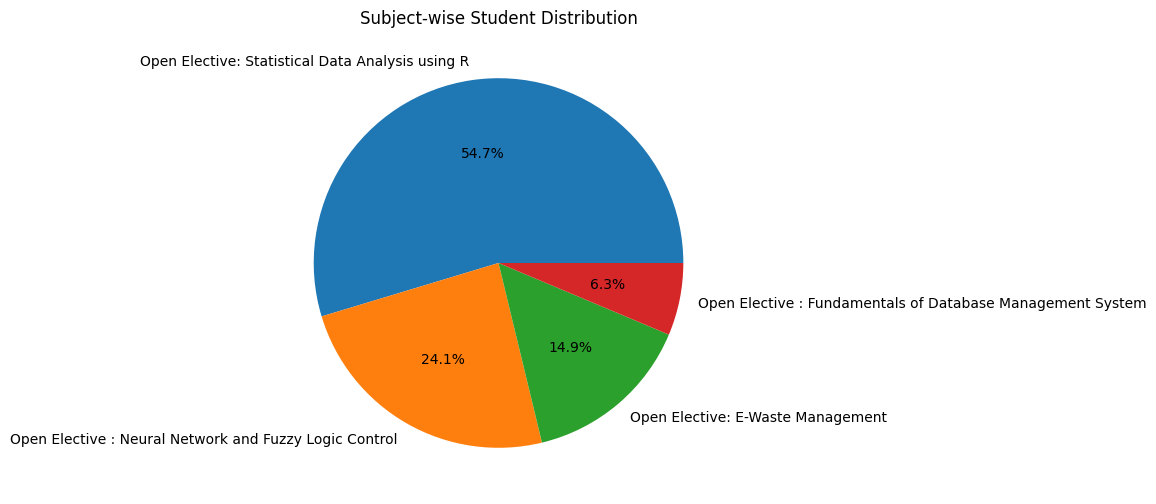

In [50]:
subject_counts = df['Course Name'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(subject_counts, labels = subject_counts.index, autopct='%1.1f%%')
plt.title('Subject-wise Student Distribution')
plt.show()

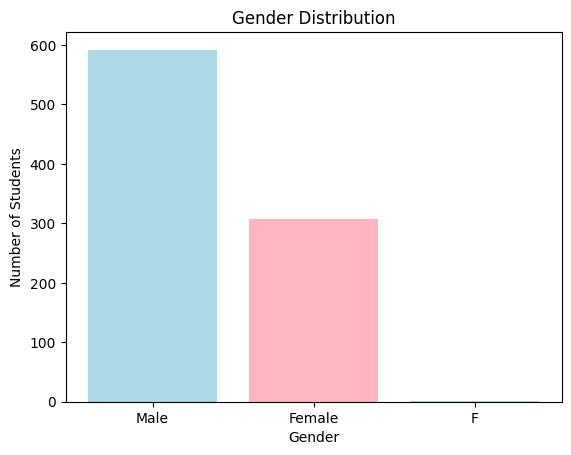

In [51]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()
